
C controls complexity:
Small C = SIMPLE model (may underfit)
Large C = FLEXIBLE model (may overfit)

      C        TrainAcc   TestAcc   What it suggests
    0.0001       0.937      0.923   Good balance
 0.0004642       0.941      0.923   Good balance
  0.002154       0.960      0.930   Good balance
      0.01       0.972      0.951   Good balance
   0.04642       0.984      0.979   Good balance
    0.2154       0.986      0.986   Good balance
         1       0.988      0.979   Good balance
     4.642       0.991      0.972   Good balance
     21.54       0.988      0.972   Good balance
       100       0.988      0.972   Good balance
     464.2       0.991      0.965   Good balance
      2154       0.991      0.965   Good balance
     1e+04       1.000      0.965   Good balance


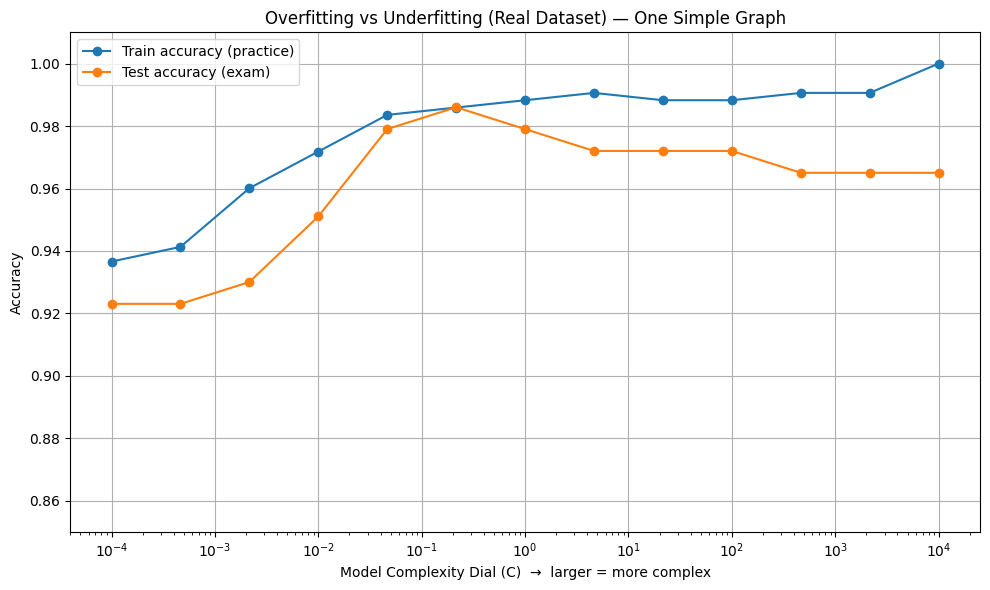


How to read the graph:
1) If BOTH lines are low → UNDERFITTING (model too simple)
2) If blue is high but orange drops → OVERFITTING (memorizing train)
3) Best region is where orange is highest and gap is small → GOOD FIT



In [4]:
#!/usr/bin/env python3
"""
ML Bytes: Overfitting vs Underfitting (REAL dataset, SIMPLE code)

Dataset: Breast Cancer (built into scikit-learn)
Model: Logistic Regression

We will ONLY vary ONE thing: model "complexity".

In Logistic Regression, complexity is controlled by C:
- Small C  => strong regularization => SIMPLE model (can UNDERFIT)
- Large C  => weak regularization   => FLEXIBLE model (can OVERFIT)

We will:
1) Load data
2) Split into Train (practice) and Test (exam)
3) Train models with different C values
4) Plot Train vs Test accuracy
5) Explain how to interpret the graph

Run:
  pip install scikit-learn matplotlib numpy
  python ml_bytes_overfit_underfit_simple.py
"""

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# ----------------------------
# 1) Load a REAL dataset
# ----------------------------
# This dataset has medical features used to classify tumors:
# y = 0 means "malignant"
# y = 1 means "benign"
data = load_breast_cancer()
X = data.data
y = data.target


# ----------------------------
# 2) Split into Train/Test
# ----------------------------
# Train = practice questions
# Test  = final exam (new unseen questions)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,       # 25% for testing
    random_state=7,       # fixed seed so results are repeatable
    stratify=y            # keeps class balance similar in train/test
)


# ----------------------------
# 3) Try multiple complexity levels
# ----------------------------
# C is our "complexity dial".
# We'll try small -> medium -> large.
Cs = np.logspace(-4, 4, 13)  # 0.0001 ... 10000

train_acc = []
test_acc = []

for C in Cs:
    # Pipeline = a clean way to run steps in order.
    # Step A: StandardScaler -> makes all features comparable
    # Step B: LogisticRegression -> classifier
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(C=C, max_iter=5000, solver="liblinear"))
    ])

    # Train the model on TRAIN data
    model.fit(X_train, y_train)

    # Score = accuracy
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))


train_acc = np.array(train_acc)
test_acc = np.array(test_acc)


# ----------------------------
# 4) Print a small readable summary
# ----------------------------
print("\nC controls complexity:")
print("Small C = SIMPLE model (may underfit)")
print("Large C = FLEXIBLE model (may overfit)\n")

print("      C        TrainAcc   TestAcc   What it suggests")
for C, tr, te in zip(Cs, train_acc, test_acc):

    # Simple interpretation based on train vs test patterns
    if tr < 0.93 and te < 0.93:
        note = "Underfitting (too simple)"
    elif tr - te > 0.04:
        note = "Overfitting (train much better than test)"
    else:
        note = "Good balance"

    print(f"{C:>10.4g}     {tr:>7.3f}    {te:>7.3f}   {note}")


# ----------------------------
# 5) Plot Train vs Test Accuracy
# ----------------------------
plt.figure(figsize=(10, 6))

# semilogx = x-axis is log scale (because C spans huge range)
plt.semilogx(Cs, train_acc, marker="o", label="Train accuracy (practice)")
plt.semilogx(Cs, test_acc, marker="o", label="Test accuracy (exam)")

plt.title("Overfitting vs Underfitting (Real Dataset) — One Simple Graph")
plt.xlabel("Model Complexity Dial (C)  →  larger = more complex")
plt.ylabel("Accuracy")

plt.ylim(0.85, 1.01)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# ----------------------------
# 6) How to interpret the graph (in plain English)
# ----------------------------
print("\nHow to read the graph:")
print("1) If BOTH lines are low → UNDERFITTING (model too simple)")
print("2) If blue is high but orange drops → OVERFITTING (memorizing train)")
print("3) Best region is where orange is highest and gap is small → GOOD FIT\n")


In [7]:
Cs

array([1.00000000e-04, 4.64158883e-04, 2.15443469e-03, 1.00000000e-02,
       4.64158883e-02, 2.15443469e-01, 1.00000000e+00, 4.64158883e+00,
       2.15443469e+01, 1.00000000e+02, 4.64158883e+02, 2.15443469e+03,
       1.00000000e+04])